In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/customer_shopping_behavior.csv')

In [5]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [37]:
df.describe(include = 'all')

,customer_id,age,gender,item_purchased,category,purcahse_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases,age_group
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7,4
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months,Young Adult
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584,1028
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750051,NaN,NaN,NaN,NaN,25.351538,NaN,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.713590,NaN,NaN,NaN,NaN,14.447125,NaN,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN,NaN


In [7]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [12]:
df.duplicated().sum()


np.int64(0)

In [14]:
df['Review Rating'] = df.groupby('Category')['Review Rating'].transform(lambda x: x.fillna(x.median()))

In [15]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [23]:
from os import rename
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df = df.rename(columns = {'purchase_amount_(usd)':'purcahse_amount'})

In [24]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purcahse_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

Create a new column of age group

In [30]:
labels = ['Young Adult', 'Adult', 'Middle-age', 'Senior']
df['age_group'] = pd.qcut(df['age'], q = 4, labels = labels)

In [31]:
df[['age', 'age_group']].head(10)

,age,age_group
0,55,Middle-age
1,19,Young Adult
2,50,Middle-age
3,21,Young Adult
4,45,Middle-age
5,46,Middle-age
6,63,Senior
7,27,Young Adult
8,26,Young Adult
9,57,Middle-age


Create column purchase frequency days

In [35]:
frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Monthly': 30,
    'Quarterly': 90,
    'Bi-weekly': 14,
    'Annually': 365,
    'Every 3 Months': 90
}

In [38]:
df['purcahse_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)

In [41]:
df[['purcahse_frequency_days', 'frequency_of_purchases']].head(10)

,purcahse_frequency_days,frequency_of_purchases
0,14.0,Fortnightly
1,14.0,Fortnightly
2,7.0,Weekly
3,7.0,Weekly
4,365.0,Annually
5,7.0,Weekly
6,90.0,Quarterly
7,7.0,Weekly
8,365.0,Annually
9,90.0,Quarterly


In [44]:
df[['discount_applied', 'promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [45]:
(df['discount_applied'] == df['promo_code_used']).all()

np.True_

In [46]:
df.drop(columns = ['promo_code_used'], axis = 1, inplace = True)

In [48]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purcahse_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purcahse_frequency_days'],
      dtype='object')

Data Analysis

**Q1. What is the total revenue generated by male vs. female customers?**

In [50]:
df.groupby('gender')['purcahse_amount'].sum()

,purcahse_amount
gender,
Female,75191
Male,157890


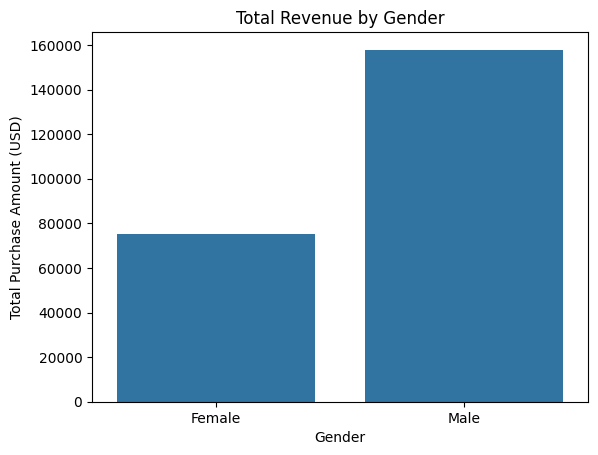

In [112]:
revenue_by_gender = df.groupby('gender')['purcahse_amount'].sum().reset_index()

#plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='purcahse_amount', data=revenue_by_gender)
plt.title('Total Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

**Q2. Which customers used a discount but still spent more than the average purchase amount?**

In [53]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purcahse_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purcahse_frequency_days'],
      dtype='object')

In [56]:
average_purchase_amount = df['purcahse_amount'].mean()

discounted_customers = df[df['discount_applied'] == 'Yes']

customers_above_average_with_discount = discounted_customers[
    discounted_customers['purcahse_amount'] > average_purchase_amount
]

display(customers_above_average_with_discount)

,customer_id,age,gender,item_purchased,category,purcahse_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,previous_purchases,payment_method,frequency_of_purchases,age_group,purcahse_frequency_days
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly,Young Adult,14.0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,Middle-age,7.0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,Young Adult,7.0
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,49,Cash,Quarterly,Senior,90.0
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,8,Venmo,Annually,Young Adult,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,1667,51,Male,Skirt,Clothing,64,Arkansas,M,Blue,Summer,3.1,No,Store Pickup,Yes,47,PayPal,Annually,Middle-age,365.0
1670,1671,22,Male,Pants,Clothing,73,Utah,L,Cyan,Fall,3.6,No,Free Shipping,Yes,20,Cash,Weekly,Young Adult,7.0
1672,1673,18,Male,Boots,Footwear,73,South Carolina,L,Gold,Fall,3.8,No,Free Shipping,Yes,15,Venmo,Quarterly,Young Adult,90.0
1673,1674,21,Male,Blouse,Clothing,62,Hawaii,M,Violet,Fall,3.4,No,Next Day Air,Yes,49,Venmo,Bi-Weekly,Young Adult,NaN


**Q3. Which are the top 5 products with the highest average review rating?**

In [57]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purcahse_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purcahse_frequency_days'],
      dtype='object')

In [60]:
df['item_purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [68]:
top_rated_products = df.groupby('item_purchased')['review_rating'].mean().sort_values(ascending=False)

display(top_rated_products.head(5))

,review_rating
item_purchased,
Gloves,3.861429
Sandals,3.844375
Boots,3.818750
Hat,3.801299
Skirt,3.784810


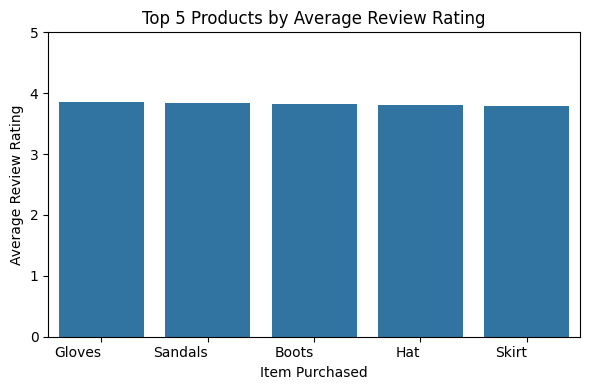

In [117]:
plt.figure(figsize=(6, 4))
sns.barplot(x=top_rated_products.head().index, y=top_rated_products.head().values)
plt.title('Top 5 Products by Average Review Rating')
plt.xlabel('Item Purchased')
plt.ylabel('Average Review Rating')
plt.ylim(0, 5)
plt.xticks(rotation='horizontal', ha='right')
plt.tight_layout()
plt.show()

**Q4. Compare the average Purchase Amounts between Standard and Express Shipping**



In [66]:
shipping_comparison = df[df['shipping_type'].isin(['Standard', 'Express'])].groupby('shipping_type')['purcahse_amount'].mean().reset_index()
display(shipping_comparison)

,shipping_type,purcahse_amount
0,Express,60.475232
1,Standard,58.460245


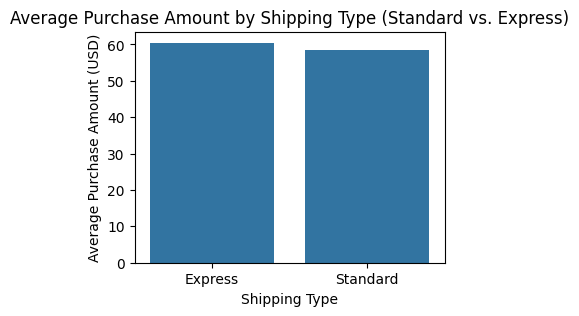

In [78]:
plt.figure(figsize=(4, 3))
sns.barplot(x='shipping_type', y='purcahse_amount', data=shipping_comparison)
plt.title('Average Purchase Amount by Shipping Type (Standard vs. Express)')
plt.xlabel('Shipping Type')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

**Q5. Do subscribed customers spend more? Compare average spend and total revenue**

In [75]:
purchase_by_subscription = df.groupby('subscription_status')['purcahse_amount'].agg(['mean', 'sum']).reset_index()

display(purchase_by_subscription)

,subscription_status,mean,sum
0,No,59.865121,170436
1,Yes,59.491928,62645


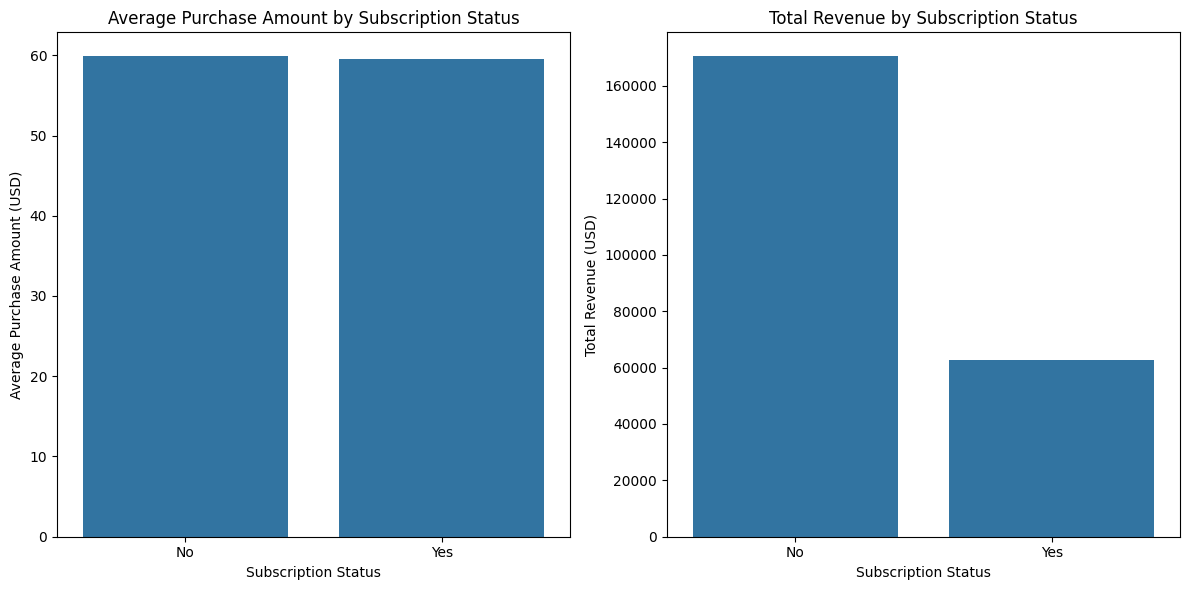

In [76]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='subscription_status', y='mean', data=purchase_by_subscription)
plt.title('Average Purchase Amount by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Average Purchase Amount (USD)')

plt.subplot(1, 2, 2)
sns.barplot(x='subscription_status', y='sum', data=purchase_by_subscription)
plt.title('Total Revenue by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Total Revenue (USD)')

plt.tight_layout()
plt.show()

In [77]:
average_spend_difference = purchase_by_subscription[purchase_by_subscription['subscription_status'] == 'Yes']['mean'].iloc[0] - purchase_by_subscription[purchase_by_subscription['subscription_status'] == 'No']['mean'].iloc[0]

print(f"The difference in average spend between subscribed and non-subscribed customers is: {average_spend_difference:.2f} USD")

The difference in average spend between subscribed and non-subscribed customers is: -0.37 USD


**Q6. Which 5 products have the highest percentage of purchases with discounts applied?**

In [81]:
discounted_purchases = df[df['discount_applied'] == 'Yes']

discount_percentage_by_product = discounted_purchases['item_purchased'].value_counts() / df['item_purchased'].value_counts() * 100

top_5_discounted_products = discount_percentage_by_product.sort_values(ascending=False).head(5)

display(top_5_discounted_products)

,count
item_purchased,
Hat,50.000000
Sneakers,49.655172
Coat,49.068323
Sweater,48.170732
Pants,47.368421


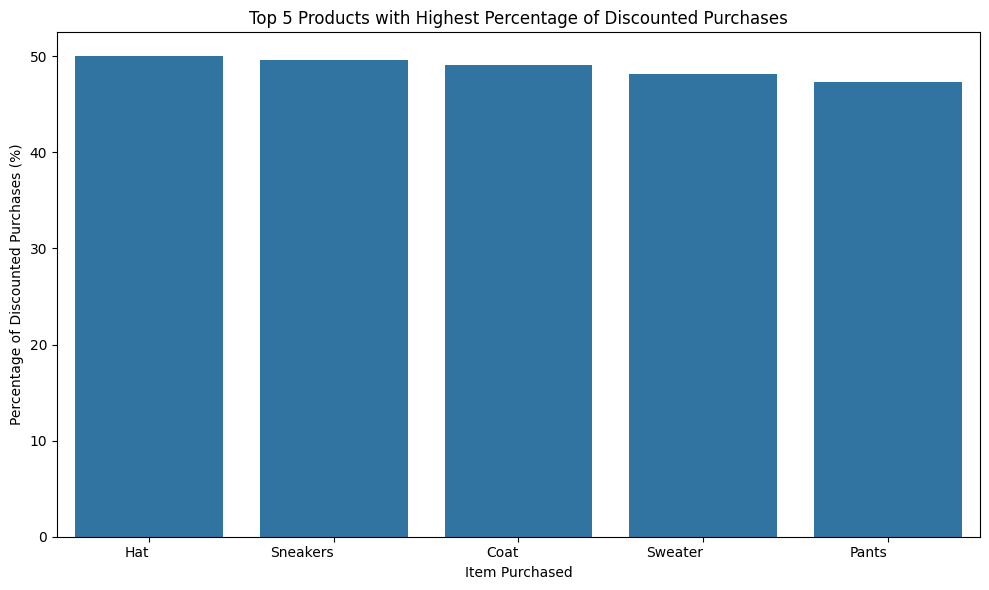

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_discounted_products.index, y=top_5_discounted_products.values)
plt.title('Top 5 Products with Highest Percentage of Discounted Purchases')
plt.xlabel('Item Purchased')
plt.ylabel('Percentage of Discounted Purchases (%)')
plt.xticks(rotation='horizontal', ha='right')
plt.tight_layout()
plt.show()

**Q7. Segment customers into New, Returning, and Loyal based on their total number of previous purchases, and show the count of each segment.**


In [105]:
def segment_customer(previous_purchases):
    if previous_purchases <= 1:
        return 'New'
    elif 2 <= previous_purchases <= 10:
        return 'Returning'
    else:
        return 'Loyal'

df['customer_segment'] = df['previous_purchases'].apply(segment_customer)

customer_segment_counts = df['customer_segment'].value_counts()

display(customer_segment_counts)

,count
customer_segment,
Loyal,3116
Returning,701
New,83


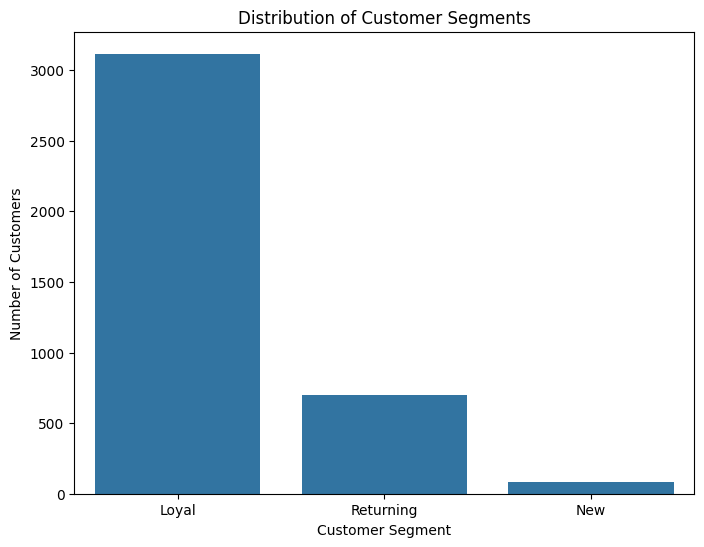

In [106]:
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_segment_counts.index, y=customer_segment_counts.values)
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()

**Q8. What are the top 3 most purchased products within each category?**

In [107]:
top_products_by_category = df.groupby('category')['item_purchased'].value_counts().groupby(level=0).head(3)

display(top_products_by_category)

category     item_purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
Clothing     Blouse            171
             Pants             171
             Shirt             169
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

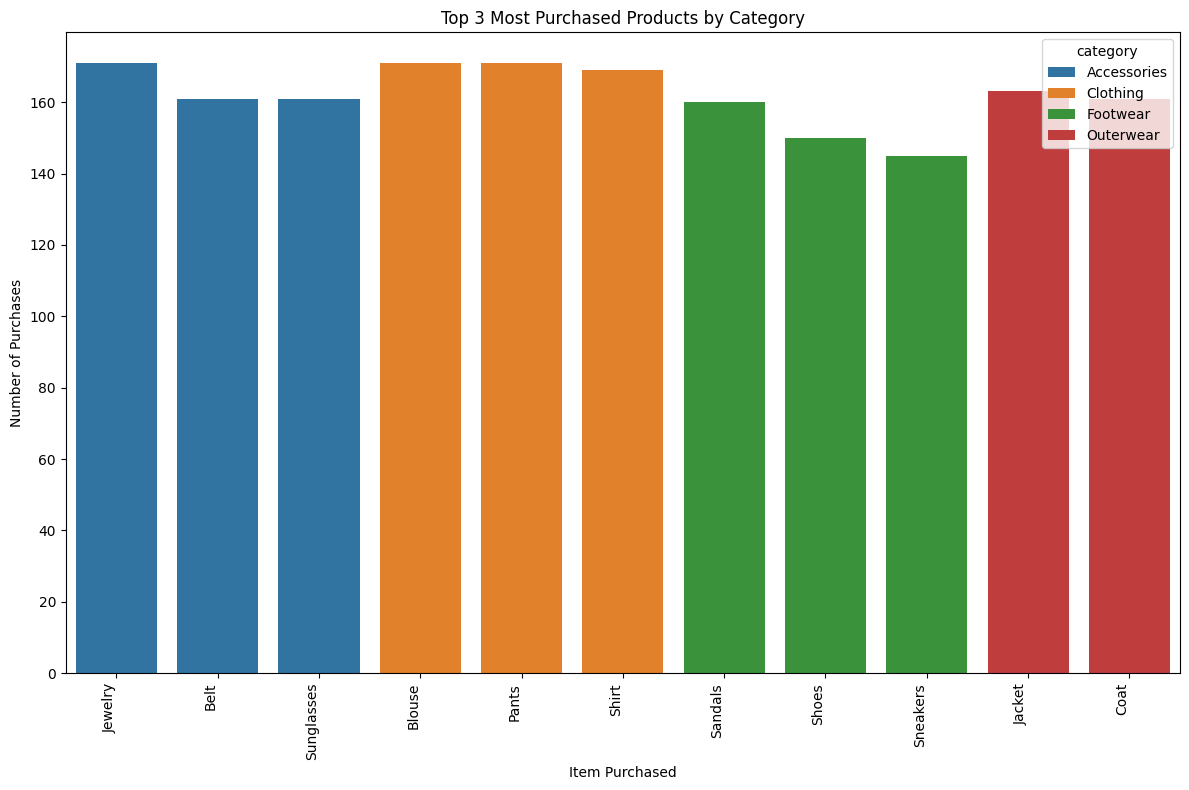

In [110]:
top_products_by_category_df = top_products_by_category.reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.barplot(x='item_purchased', y='count', hue='category', data=top_products_by_category_df)
plt.title('Top 3 Most Purchased Products by Category')
plt.xlabel('Item Purchased')
plt.ylabel('Number of Purchases')
plt.xticks(rotation='vertical', ha='right')
plt.tight_layout()
plt.show()

**Q9. Are customers who are repeat buyers (more than 5 previous purchases) also likely to subscribe?**

In [113]:
repeat_buyers = df[df['previous_purchases'] > 5]

subscription_status_repeat_buyers = repeat_buyers['subscription_status'].value_counts(normalize=True) * 100

display(subscription_status_repeat_buyers)

,proportion
subscription_status,
No,72.439586
Yes,27.560414


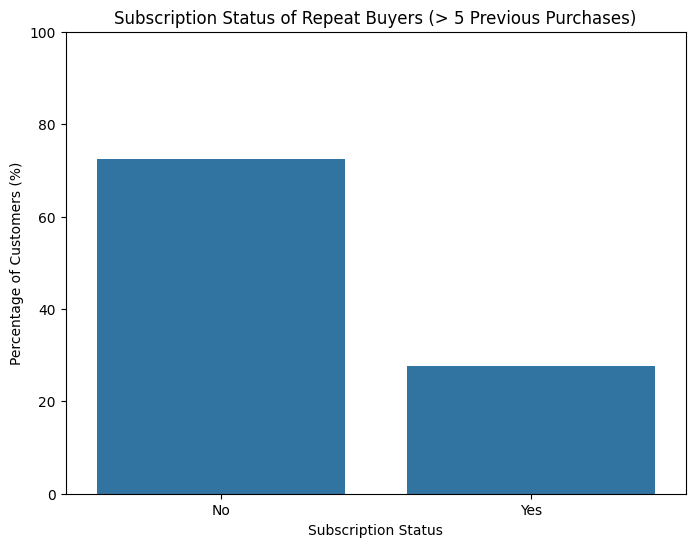

In [114]:
plt.figure(figsize=(8, 6))
sns.barplot(x=subscription_status_repeat_buyers.index, y=subscription_status_repeat_buyers.values)
plt.title('Subscription Status of Repeat Buyers (> 5 Previous Purchases)')
plt.xlabel('Subscription Status')
plt.ylabel('Percentage of Customers (%)')
plt.ylim(0, 100)
plt.show()

**Q10. What is the revenue contribution of each age group?**

In [115]:
revenue_by_age_group = df.groupby('age_group')['purcahse_amount'].sum().reset_index()

display(revenue_by_age_group)

/tmp/ipython-input-2088972985.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age_group = df.groupby('age_group')['purcahse_amount'].sum().reset_index()


,age_group,purcahse_amount
0,Young Adult,62143
1,Adult,55978
2,Middle-age,59197
3,Senior,55763
